# Importação das bibliotecas básicas

In [8]:
import pickle

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler


# Base de dados cobertura vegetal

Documentação do dataset: https://archive.ics.uci.edu/dataset/31/covertype

## Exploração dos dados

Carregue os dados a partir do arquivo csv, em um dataframe do Pandas.

In [14]:
base_covtype = pd.read_csv('../datasets/cov_types.csv')

Exiba os dados para uma inspeção inicial.

In [15]:
base_covtype

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area,Soil_Type,Cover_Type
0,2767.0,66.0,17.0,210.0,18.0,1190.0,234.0,204.0,96.0,2251.0,2,30,Lodgepole Pine
1,2724.0,160.0,19.0,60.0,4.0,1350.0,236.0,240.0,127.0,2514.0,2,16,Lodgepole Pine
2,2360.0,65.0,7.0,127.0,21.0,1377.0,227.0,226.0,134.0,339.0,3,5,Ponderosa Pine
3,2995.0,45.0,4.0,285.0,30.0,5125.0,221.0,231.0,146.0,5706.0,0,11,Lodgepole Pine
4,2400.0,106.0,27.0,150.0,63.0,342.0,253.0,196.0,51.0,811.0,2,3,Ponderosa Pine
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2917.0,90.0,9.0,247.0,25.0,4095.0,235.0,225.0,121.0,3901.0,0,28,Lodgepole Pine
9996,3015.0,38.0,8.0,361.0,74.0,4846.0,220.0,223.0,138.0,1611.0,0,28,Lodgepole Pine
9997,3052.0,79.0,19.0,90.0,11.0,1003.0,241.0,203.0,85.0,1490.0,2,22,Spruce/Fir
9998,2958.0,58.0,6.0,319.0,19.0,2468.0,225.0,227.0,137.0,2280.0,0,28,Lodgepole Pine


Exiba as 10 primeiras entradas da base.

In [16]:
base_covtype.head(10)

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area,Soil_Type,Cover_Type
0,2767.0,66.0,17.0,210.0,18.0,1190.0,234.0,204.0,96.0,2251.0,2,30,Lodgepole Pine
1,2724.0,160.0,19.0,60.0,4.0,1350.0,236.0,240.0,127.0,2514.0,2,16,Lodgepole Pine
2,2360.0,65.0,7.0,127.0,21.0,1377.0,227.0,226.0,134.0,339.0,3,5,Ponderosa Pine
3,2995.0,45.0,4.0,285.0,30.0,5125.0,221.0,231.0,146.0,5706.0,0,11,Lodgepole Pine
4,2400.0,106.0,27.0,150.0,63.0,342.0,253.0,196.0,51.0,811.0,2,3,Ponderosa Pine
5,2656.0,20.0,9.0,323.0,73.0,1082.0,214.0,221.0,143.0,1036.0,0,11,Lodgepole Pine
6,2992.0,105.0,36.0,201.0,141.0,1211.0,252.0,170.0,12.0,1584.0,2,32,Spruce/Fir
7,3110.0,32.0,14.0,379.0,43.0,5028.0,216.0,208.0,125.0,2845.0,0,29,Spruce/Fir
8,3242.0,40.0,15.0,85.0,19.0,3330.0,220.0,207.0,118.0,3164.0,2,23,Lodgepole Pine
9,3025.0,273.0,10.0,391.0,24.0,2797.0,192.0,243.0,190.0,234.0,0,21,Spruce/Fir


Exiba as 10 últimas entradas da base.

In [17]:
base_covtype.tail(10)

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area,Soil_Type,Cover_Type
9990,2788.0,20.0,9.0,30.0,2.0,3555.0,214.0,221.0,143.0,2984.0,0,22,Spruce/Fir
9991,2899.0,84.0,17.0,85.0,21.0,1176.0,242.0,208.0,90.0,1664.0,0,29,Lodgepole Pine
9992,3517.0,270.0,5.0,459.0,70.0,1445.0,207.0,241.0,173.0,1937.0,1,39,Krummholz
9993,2942.0,351.0,10.0,391.0,29.0,5337.0,203.0,224.0,159.0,2105.0,0,28,Lodgepole Pine
9994,2055.0,327.0,19.0,30.0,14.0,532.0,169.0,215.0,183.0,684.0,3,13,Douglas-fir
9995,2917.0,90.0,9.0,247.0,25.0,4095.0,235.0,225.0,121.0,3901.0,0,28,Lodgepole Pine
9996,3015.0,38.0,8.0,361.0,74.0,4846.0,220.0,223.0,138.0,1611.0,0,28,Lodgepole Pine
9997,3052.0,79.0,19.0,90.0,11.0,1003.0,241.0,203.0,85.0,1490.0,2,22,Spruce/Fir
9998,2958.0,58.0,6.0,319.0,19.0,2468.0,225.0,227.0,137.0,2280.0,0,28,Lodgepole Pine
9999,2682.0,91.0,13.0,162.0,32.0,1369.0,240.0,219.0,108.0,1661.0,2,10,Lodgepole Pine


Exiba as estatísticas básicas da base.

In [18]:
base_covtype.describe()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area,Soil_Type
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,2966.946400,153.860000,14.148400,270.744400,46.610200,2357.047800,212.520300,223.253900,141.993600,1986.776600,1.107900,23.584100
std,278.877757,111.313091,7.467714,211.481433,58.188252,1564.031388,26.642597,19.851419,38.458979,1324.588532,1.058097,9.413001
min,1893.000000,0.000000,0.000000,0.000000,-132.000000,0.000000,60.000000,104.000000,0.000000,0.000000,0.000000,0.000000
25%,2820.000000,58.000000,9.000000,108.000000,7.000000,1092.000000,199.000000,213.000000,119.000000,1034.000000,0.000000,19.000000
50%,3004.000000,125.000000,13.000000,218.000000,30.000000,2012.000000,218.000000,226.000000,143.000000,1711.000000,1.000000,28.000000
75%,3167.000000,255.000000,18.000000,390.000000,69.000000,3347.000000,231.000000,237.000000,168.000000,2556.000000,2.000000,30.000000
max,3845.000000,360.000000,55.000000,1376.000000,573.000000,6926.000000,254.000000,254.000000,250.000000,7150.000000,3.000000,39.000000


## Visualização dos dados

Exiba o nome das categorias de tipo de cobertura vegetal e sua frequência.

In [22]:
np.unique(base_covtype['Cover_Type'], return_counts = True)

(array(['Aspen', 'Cottonwood/Willow', 'Douglas-fir', 'Krummholz',
        'Lodgepole Pine', 'Ponderosa Pine', 'Spruce/Fir'], dtype=object),
 array([ 163,   55,  278,  362, 4847,  581, 3714]))

Exiba a mesma informação, mas como um gráfico de barras.

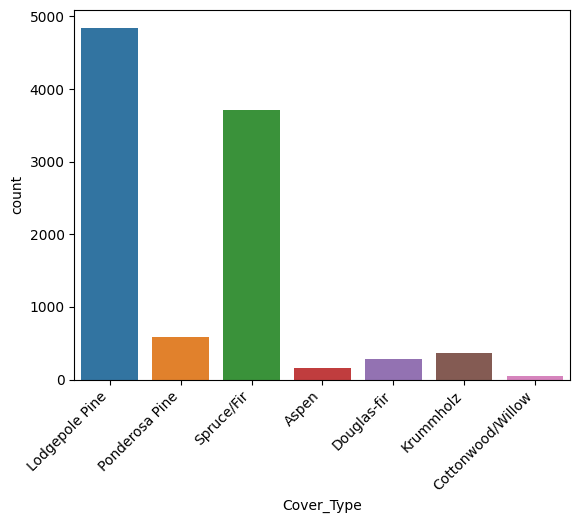

In [26]:
sns.countplot(x = base_covtype['Cover_Type'], hue = base_covtype['Cover_Type'])
# Mantenha a próxima linha para rotacionar os rótulos e facilitar sua leitura
plt.xticks(rotation=45, ha='right');

Exiba um histograma para as variáveis numéricas (`Elevation` até `Horizontal_Distance_To_Fire_Points`).

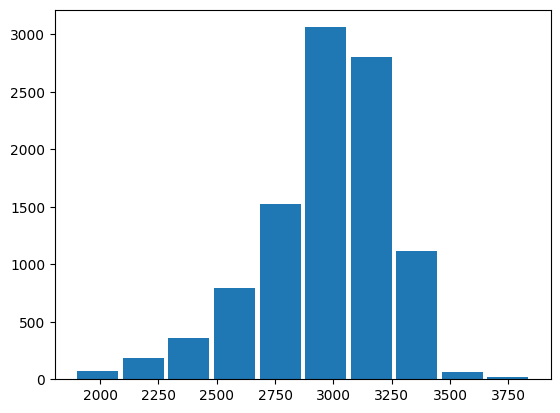

In [37]:
plt.hist(x = base_covtype['Elevation'], rwidth=0.9);

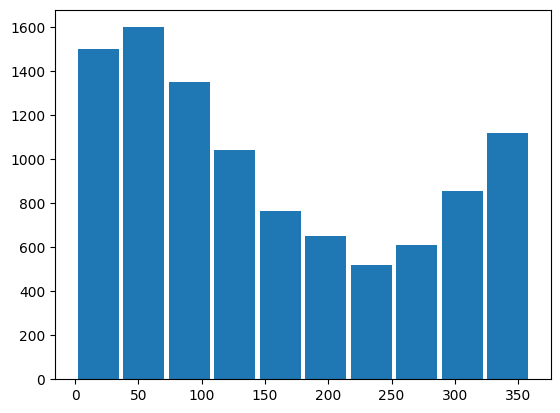

In [38]:
plt.hist(x = base_covtype['Aspect'], rwidth=0.9);

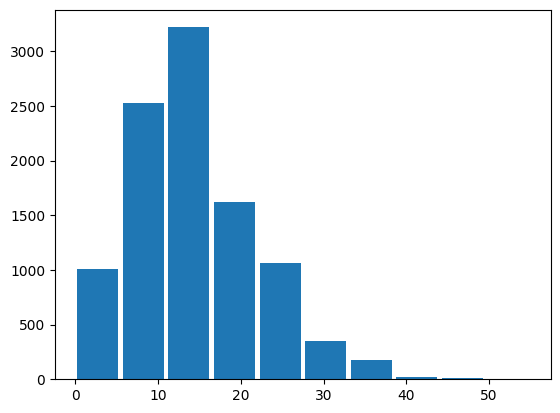

In [39]:
plt.hist(x = base_covtype['Slope'], rwidth=0.9);

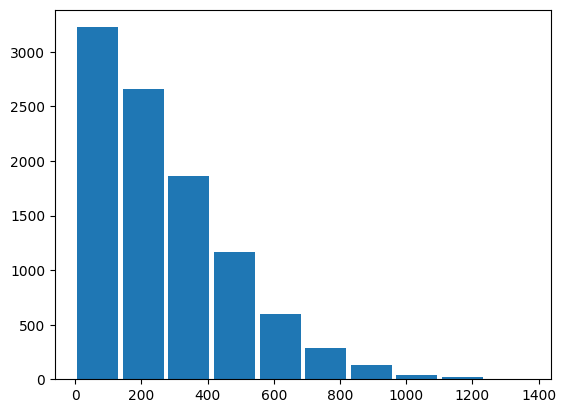

In [40]:
plt.hist(x = base_covtype['Horizontal_Distance_To_Hydrology'], rwidth=0.9);

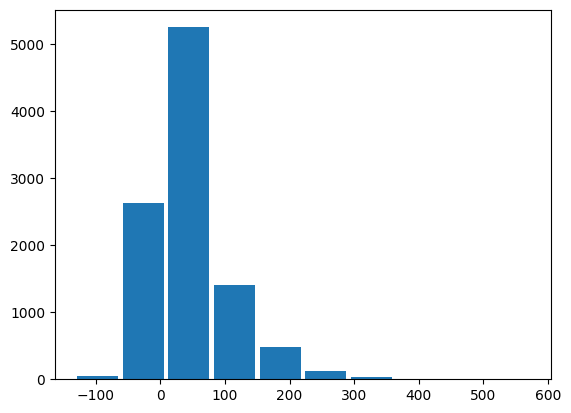

In [41]:
plt.hist(x = base_covtype['Vertical_Distance_To_Hydrology'], rwidth=0.9);

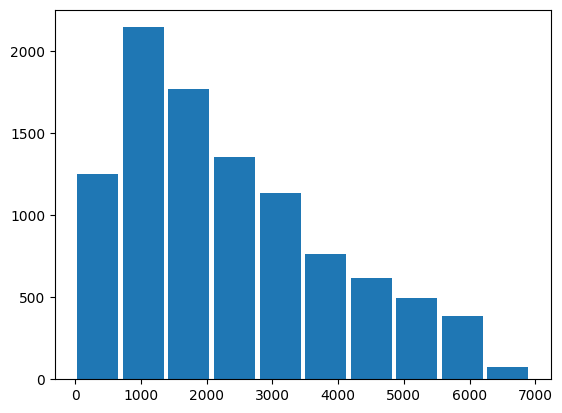

In [42]:
plt.hist(x = base_covtype['Horizontal_Distance_To_Roadways'], rwidth=0.9);

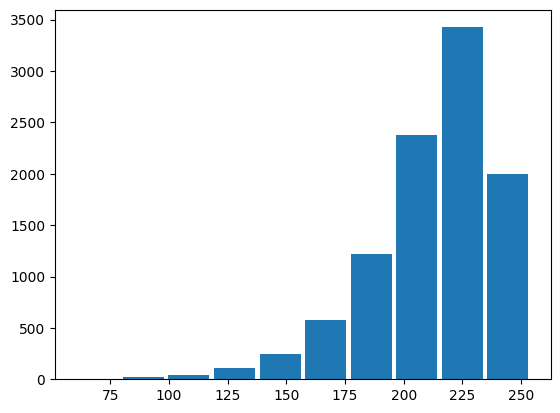

In [43]:
plt.hist(x = base_covtype['Hillshade_9am'], rwidth=0.9);

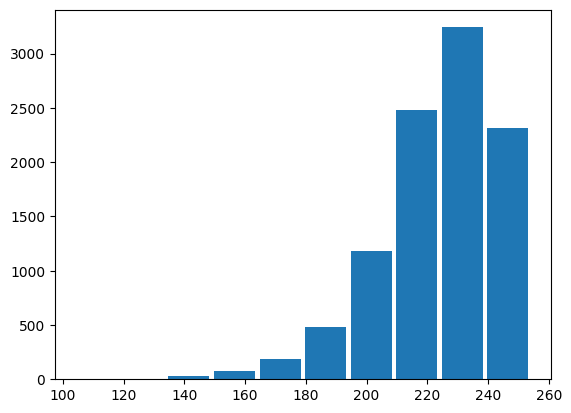

In [44]:
plt.hist(x = base_covtype['Hillshade_Noon'], rwidth=0.9);

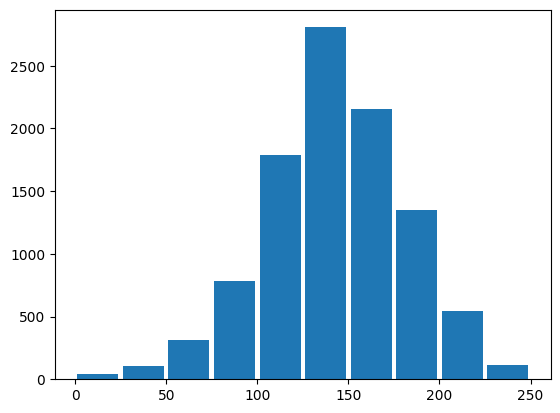

In [45]:
plt.hist(x = base_covtype['Hillshade_3pm'], rwidth=0.9);

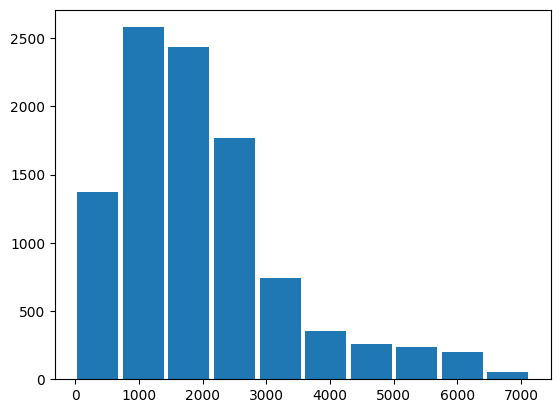

In [46]:
plt.hist(x = base_covtype['Horizontal_Distance_To_Fire_Points'], rwidth=0.9);

Exiba um grid com gráficos de correlação entre as variáveis numéricas. Use `Cover_Type` para codificar as cores.

In [47]:
fig = px.scatter_matrix(base_covtype,
                        dimensions=['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology',
                                    'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways',
                                    'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
                                    'Horizontal_Distance_To_Fire_Points'],
                        color='Cover_Type')
fig.show(renderer="browser")

## Divisão entre previsores e classe

Separe as variáveis preditoras em uma variável `X`, no formato de NumPy array. Como a variável alvo é a última coluna, você pode selecionar as variáveis preditoras com a notação `:-1`, que significa "desde o início até o penúltimo".

In [48]:
X = base_covtype.iloc[:, :-1].values

Exiba estes valores.

In [49]:
X

array([[2.767e+03, 6.600e+01, 1.700e+01, ..., 2.251e+03, 2.000e+00,
        3.000e+01],
       [2.724e+03, 1.600e+02, 1.900e+01, ..., 2.514e+03, 2.000e+00,
        1.600e+01],
       [2.360e+03, 6.500e+01, 7.000e+00, ..., 3.390e+02, 3.000e+00,
        5.000e+00],
       ...,
       [3.052e+03, 7.900e+01, 1.900e+01, ..., 1.490e+03, 2.000e+00,
        2.200e+01],
       [2.958e+03, 5.800e+01, 6.000e+00, ..., 2.280e+03, 0.000e+00,
        2.800e+01],
       [2.682e+03, 9.100e+01, 1.300e+01, ..., 1.661e+03, 2.000e+00,
        1.000e+01]], shape=(10000, 12))

Separe a variável alvo em uma variável `y`, também como NumPy array. Você também pode usar a notação `-1`, que neste contexto significa "última coluna".

In [53]:
Y = base_covtype.iloc[:, -1].values

Exiba os valores.

In [54]:
Y

array(['Lodgepole Pine', 'Lodgepole Pine', 'Ponderosa Pine', ...,
       'Spruce/Fir', 'Lodgepole Pine', 'Lodgepole Pine'],
      shape=(10000,), dtype=object)

## Tratamento da variável alvo (LabelEncoder)

De acordo com a [documentação mais recente](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html), o `LabelEncoder` "deve ser usado para codificar os valores alvo, ou seja `y`, e não a entrada `X`". Isso porque os valores retornados são apenas rótulos, não tendo significado numérico, portanto não sendo úteis para treinar algoritmos. O mesmo se aplica à variável `y`, mas ela pode ser apresentada aos algoritmos do Scikit-Learn no formato *label encoded* porque, internamente, os algoritmos fazem a transformação seguinte, convertendo os rótulos numéricos no formato *one hot encoded*, antes de iniciar os cálculos.

Use a classe `LabelEncoder` para codificar a variável `y`.

In [55]:
label_encoder = LabelEncoder()
Y = label_encoder.fit_transform(Y)

Exiba os novos valores de `y`.

In [56]:
Y

array([4, 4, 5, ..., 6, 4, 4], shape=(10000,))

## Tratamento das variáveis preditoras (StandardScaler e OneHotEncoder)

A variável `X` agora contém 12 colunas, sendo aquelas de índice 0 a 9 numéricas, e as de índice 10 e 11 categóricas.

Para dar seguimento ao processamento, as variáveis numéricas devem ser escalonadas, e as variáveis categóricas devem ser transformadas usando One Hot Encoding.

Nós podemos fazer essas duas operações de uma única vez, passando ambos os transformadores para a classe `ColumnTransformer`.

Crie este encoder, usando dois transformadores. O primeiro deve ser uma instância de `StandardScaler`, e deve receber os índices das colunas numéricas (dica: ao invés de passar uma lista de inteiros, você pode indicar os índices com o construtor `slice(0, 10)`, que corresponde a extrair aos índices `[0:10]`), e o segundo deve ser uma instância de `OneHotEncoder`, recebendo os índices das colunas categóricas. Ao construtor de `OneHotEncoder`, informe o parâmetro `sparse_output=False`, para garantir que o resultado não seja expresso como uma matriz esparsa. Como neste caso todas as colunas estão sendo transformadas, o parâmetro `remainder` de `ColumnTransformer` não é necessário.

Em seguida, transforme `X` usando este encoder.

In [57]:
X_encoder = ColumnTransformer(transformers=[
    ('StandardScaler', StandardScaler(), slice(0, 10)),
    ('OneHotEncoder', OneHotEncoder(sparse_output=False), [10, 11])
    ])
X = X_encoder.fit_transform(X)


Exiba os novos valores de `X`.

In [58]:
X

array([[-0.71700375, -0.78934465,  0.38187624, ...,  0.        ,
         0.        ,  0.        ],
       [-0.87120088,  0.05516249,  0.6497092 , ...,  0.        ,
         0.        ,  0.        ],
       [-2.17649753, -0.79832877, -0.95728858, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.30500049, -0.67255111,  0.6497092 , ...,  0.        ,
         0.        ,  0.        ],
       [-0.03208161, -0.8612176 , -1.09120506, ...,  0.        ,
         0.        ,  0.        ],
       [-1.02181203, -0.56474169, -0.15378969, ...,  0.        ,
         0.        ,  0.        ]], shape=(10000, 53))

## Divisão em split de treinamento e teste

Separe as variáveis `X` e `y` em splits para treinamento e teste. Use uma fração de 25% para teste. Fixe a semente de números aleatórios, informando o parâmetro `random_state=0`.

In [59]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 0)

Exiba as dimensões das variáveis do split de treinamento, acessando o atributo `shape`.

In [60]:
X_train.shape, Y_train.shape

((7500, 53), (7500,))

Faça o mesmo para o split de teste.

In [61]:
X_test.shape, Y_test.shape

((2500, 53), (2500,))

## Salvar as variáveis

Salve as variáveis preditoras e alvo, dos dois splits, em um único arquivo `pickle` com o nome `cover_type.pkl`. A ordem deve ser: primeiro split de treinamento (`X` e `y`), depois split de teste (`X` e `y`).

In [62]:
with open('../datasets/processed/cover_type.pkl', mode='wb') as f:
    pickle.dump([X_train, Y_train, X_test, Y_test], f)

# Aprendizagem bayesiana (Naive Bayes)

Comece recuperando os dados preditores, de treino e de teste, a partir do arquivo `cover_type.pkl` salvo na pasta do Drive. Lembre-se de que você deve instanciar as variáveis `X` e `y`, dos splits `train` e `test`,  na mesma ordem em que salvou.

In [3]:
import pickle

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.naive_bayes import GaussianNB
from yellowbrick.classifier import ConfusionMatrix

In [4]:
with open('../datasets/processed/cover_type.pkl', 'rb') as f:
    X_train, Y_train, X_test, Y_test = pickle.load(f)

Use o atributo `shape` para verificar quantas instâncias e quantos atributos têm cada uma dessas variáveis.

In [5]:
X_train.shape, Y_train.shape

((7500, 53), (7500,))

In [6]:
X_test.shape, Y_test.shape

((2500, 53), (2500,))

Agora, seguindo os exemplos apresentandos na aula, implemente uma instância da classe `GaussianNB`, e logo em seguida use os dados de treino para ajustar este classificador.

In [7]:
naive_classifier = GaussianNB()
naive_classifier.fit(X_train, Y_train)

,priors,None
,var_smoothing,1e-09


DICA: observe que instanciar o classificador em um Jupyter Notebook exibe um pequeno card com dois botões no topo: (i) que fornece informações sobre o classificador, e (?) que o leva para a documentação.

Use o classificador ajustado para fazer predições com os dados de teste.

In [8]:
previsoes = naive_classifier.predict(X_test)

Exiba esses resultados.

In [9]:
previsoes

array([0, 3, 1, ..., 3, 3, 1], shape=(2500,))

In [11]:
Y_test

array([4, 4, 1, ..., 6, 6, 5], shape=(2500,))

Utilize a função adequada para determinar a acurácia deste classificador no split de teste.

In [10]:
accuracy_score(Y_test, previsoes)

0.142

Exiba a matriz de confusão para o classificador.

0.142

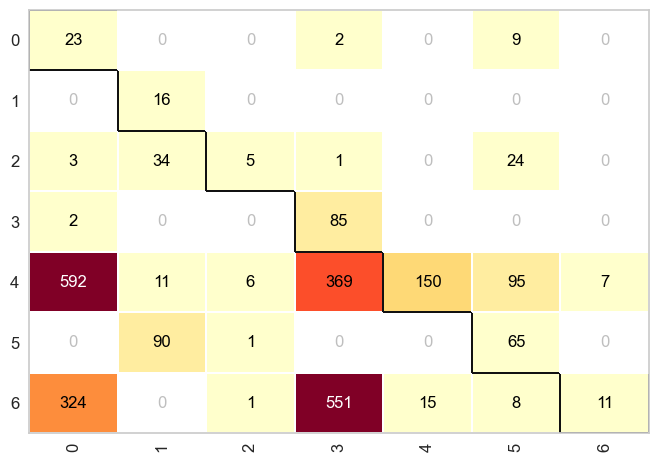

In [12]:
cm = ConfusionMatrix(naive_classifier)
cm.fit(X_train, Y_train)
cm.score(X_test, Y_test)

Exiba o reporte de classificação no split de teste.

In [13]:
print(classification_report(Y_test, previsoes))

              precision    recall  f1-score   support

           0       0.02      0.68      0.05        34
           1       0.11      1.00      0.19        16
           2       0.38      0.07      0.12        67
           3       0.08      0.98      0.16        87
           4       0.91      0.12      0.22      1230
           5       0.32      0.42      0.36       156
           6       0.61      0.01      0.02       910

    accuracy                           0.14      2500
   macro avg       0.35      0.47      0.16      2500
weighted avg       0.70      0.14      0.15      2500



Estes resultados ficaram bem insatisfatórios. A acurácia não chegou a 15%, mas curiosamente nós observamos no reporte acima que a precisão foi alta para a classe 4, enquanto que o recall foi máximo para a classe 1. Entretanto, o score f1 ficou baixo para todas as classes.

---

**EXTRA**

De acordo com a [documentação da classe GaussianNB](https://scikit-learn.org/stable/modules/naive_bayes.html#gaussian-naive-bayes):

> "A probabilidade dos atributos é assumida como gaussiana".

Entretanto, nós não temos qualquer razão preliminar para assumir esta premissa. Se ela não for verdadeira, isso pode explicar a baixa acurácia do modelo.

Na mesma página do link, você vai encontrar outros classificadores bayesianos com implementação na biblioteca. Veja que a classe `BernoulliNB` faz uma suposição diferente: ela assume que os atributos seguem uma distribuição de Bernoulli. Tente utilizar esta classe para verificar se obtém resultados melhores.

In [14]:
from sklearn.naive_bayes import BernoulliNB

In [15]:
naive_classifier = BernoulliNB()
naive_classifier.fit(X_train, Y_train)

,alpha,1.0
,force_alpha,True
,binarize,0.0
,fit_prior,True
,class_prior,None


In [17]:
previsoes = naive_classifier.predict(X_test)

In [18]:
previsoes

array([4, 4, 1, ..., 6, 6, 2], shape=(2500,))

In [19]:
Y_test

array([4, 4, 1, ..., 6, 6, 5], shape=(2500,))

In [20]:
accuracy_score(Y_test, previsoes)

0.642

0.642

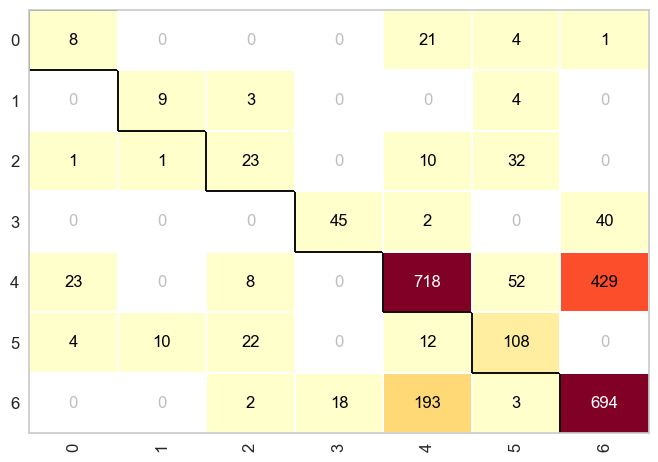

In [21]:
cm = ConfusionMatrix(naive_classifier)
cm.fit(X_train, Y_train)
cm.score(X_test, Y_test)

In [22]:
print(classification_report(Y_test, previsoes))

              precision    recall  f1-score   support

           0       0.22      0.24      0.23        34
           1       0.45      0.56      0.50        16
           2       0.40      0.34      0.37        67
           3       0.71      0.52      0.60        87
           4       0.75      0.58      0.66      1230
           5       0.53      0.69      0.60       156
           6       0.60      0.76      0.67       910

    accuracy                           0.64      2500
   macro avg       0.52      0.53      0.52      2500
weighted avg       0.66      0.64      0.64      2500



---

# Árvores de decisão

Comece recuperando os dados preditores, de treino e de teste, a partir do arquivo `cover_type.pkl` salvo na pasta processed. Lembre-se de que você deve instanciar as variáveis `X` e `y`, dos splits `train` e `test`,  na mesma ordem que salvou.

In [1]:
import pickle

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier
from yellowbrick.classifier import ConfusionMatrix

In [2]:
with open('../datasets/processed/cover_type.pkl', 'rb') as f:
    X_train, Y_train, X_test, Y_test = pickle.load(f)

Use o atributo `shape` para verificar quantas instâncias e quantos atributos têm cada uma dessas variáveis.

In [3]:
X_train.shape, Y_train.shape

((7500, 53), (7500,))

In [4]:
X_test.shape, Y_test.shape

((2500, 53), (2500,))

Instancie e treine um classificador da classe `DecisionTreeClassifier`. Use o parâmetro `criterion='gini'` (valor padrão) e `random_state=0`.

In [24]:
tree_classifier = DecisionTreeClassifier(criterion='gini', random_state=0)
tree_classifier.fit(X_train, Y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


Calcule e exiba as predições feitas no split de teste.

In [25]:
y_pred = tree_classifier.predict(X_test)

In [26]:
y_pred

array([4, 4, 1, ..., 6, 4, 5], shape=(2500,))

In [27]:
Y_test

array([4, 4, 1, ..., 6, 6, 5], shape=(2500,))

Calcule a acurácia do classificador.

In [28]:
accuracy_score(Y_test, y_pred)

0.7172

Exiba a matriz de confusão.

0.7172

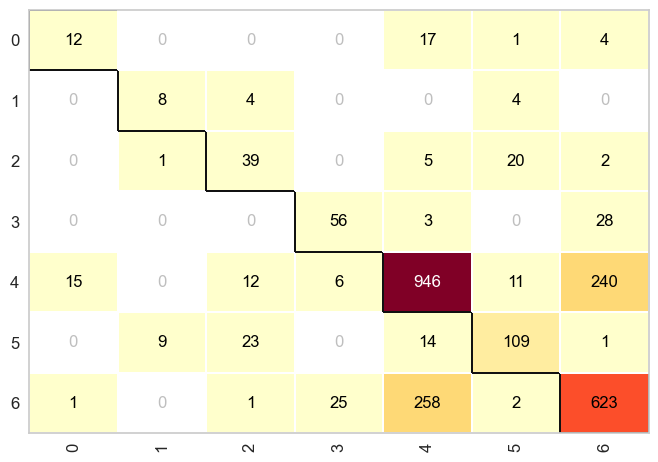

In [10]:
cm = ConfusionMatrix(tree_classifier)
cm.fit(X_train, Y_train)
cm.score(X_test, Y_test)

Exiba o reporte de classificação.

In [11]:
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.43      0.35      0.39        34
           1       0.44      0.50      0.47        16
           2       0.49      0.58      0.53        67
           3       0.64      0.64      0.64        87
           4       0.76      0.77      0.77      1230
           5       0.74      0.70      0.72       156
           6       0.69      0.68      0.69       910

    accuracy                           0.72      2500
   macro avg       0.60      0.60      0.60      2500
weighted avg       0.72      0.72      0.72      2500



A árvore de decisão já ficou muito melhor que o classificador bayesiano.

Agora repita o exercício utilizando a classe `RandomForestClassifier`. Nós não vamos informar `n_estimators` (o algoritmo vai utilizar o valor padrão de 100), nem `criterion` (o padrão é Gini). Para garantir reprodutibilidade, informe `random_state=0`.

In [29]:
tree_classifier = RandomForestClassifier(random_state=0)
tree_classifier.fit(X_train, Y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [30]:
y_pred = tree_classifier.predict(X_test)
y_pred

array([4, 4, 5, ..., 6, 6, 2], shape=(2500,))

In [31]:
Y_test

array([4, 4, 1, ..., 6, 6, 5], shape=(2500,))

In [32]:
accuracy_score(Y_test, y_pred)

0.8064

0.8064

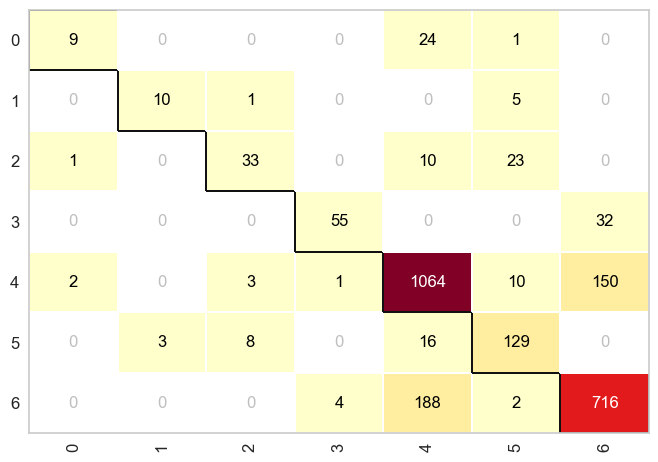

In [33]:
cm = ConfusionMatrix(tree_classifier)
cm.fit(X_train, Y_train)
cm.score(X_test, Y_test)

In [34]:
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.75      0.26      0.39        34
           1       0.77      0.62      0.69        16
           2       0.73      0.49      0.59        67
           3       0.92      0.63      0.75        87
           4       0.82      0.87      0.84      1230
           5       0.76      0.83      0.79       156
           6       0.80      0.79      0.79       910

    accuracy                           0.81      2500
   macro avg       0.79      0.64      0.69      2500
weighted avg       0.81      0.81      0.80      2500



---

**EXTRA**

[Consulte a documentação](https://scikit-learn.org/stable/api/sklearn.ensemble.html) e escolha um outro classificador do tipo *ensemble* para treinar. Observação: pode ser que nem todos os classificadores funcionem, pois eles podem ter restrições quanto ao formato dos dados apresentados.

Abaixo como exemplo está o `GradientBoostingClassifier`.

In [35]:
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
tree_classifier = GradientBoostingClassifier(random_state=0)
tree_classifier.fit(X_train, Y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [41]:
y_pred = tree_classifier.predict(X_test)

In [43]:
accuracy_score(Y_test, y_pred)

0.8064

0.8064

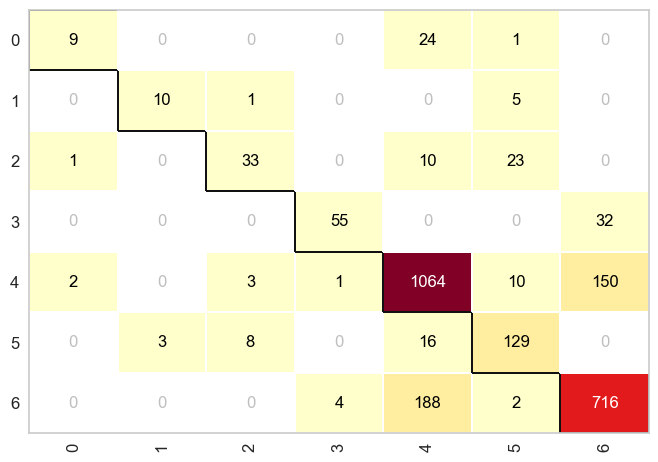

In [44]:
cm = ConfusionMatrix(tree_classifier)
cm.fit(X_train, Y_train)
cm.score(X_test, Y_test)

In [47]:
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.75      0.26      0.39        34
           1       0.77      0.62      0.69        16
           2       0.73      0.49      0.59        67
           3       0.92      0.63      0.75        87
           4       0.82      0.87      0.84      1230
           5       0.76      0.83      0.79       156
           6       0.80      0.79      0.79       910

    accuracy                           0.81      2500
   macro avg       0.79      0.64      0.69      2500
weighted avg       0.81      0.81      0.80      2500



De fato os resultados ficaram consideravelmente melhores, o que é um indicativo de que os atributos (pelo menos na forma transformada apresentada ao algoritmo, com escalonamento e *one hot encoding*) seguem uma distribuição mais bernoulliana do que gaussiana.

# Aprendizado por regras

In [2]:
import Orange
Orange.__version__

'3.39.0'

In [3]:
import pickle

from collections import Counter

import pandas as pd
import seaborn as sns

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Regras

Para gerar regras, nós precisamos começar com o arquivo com os dados originais, `cov_types.csv`, que está na pasta datasets.

Primeiro recarregue esse arquivo com o Pandas.

In [4]:
base = pd.read_csv('../datasets/cov_types.csv')
base

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area,Soil_Type,Cover_Type
0,2767.0,66.0,17.0,210.0,18.0,1190.0,234.0,204.0,96.0,2251.0,2,30,Lodgepole Pine
1,2724.0,160.0,19.0,60.0,4.0,1350.0,236.0,240.0,127.0,2514.0,2,16,Lodgepole Pine
2,2360.0,65.0,7.0,127.0,21.0,1377.0,227.0,226.0,134.0,339.0,3,5,Ponderosa Pine
3,2995.0,45.0,4.0,285.0,30.0,5125.0,221.0,231.0,146.0,5706.0,0,11,Lodgepole Pine
4,2400.0,106.0,27.0,150.0,63.0,342.0,253.0,196.0,51.0,811.0,2,3,Ponderosa Pine
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2917.0,90.0,9.0,247.0,25.0,4095.0,235.0,225.0,121.0,3901.0,0,28,Lodgepole Pine
9996,3015.0,38.0,8.0,361.0,74.0,4846.0,220.0,223.0,138.0,1611.0,0,28,Lodgepole Pine
9997,3052.0,79.0,19.0,90.0,11.0,1003.0,241.0,203.0,85.0,1490.0,2,22,Spruce/Fir
9998,2958.0,58.0,6.0,319.0,19.0,2468.0,225.0,227.0,137.0,2280.0,0,28,Lodgepole Pine


Agora, lembre-se que a coluna com a classe deve ser indicada pelo prefixo `c#`. Então, vamos renomear a coluna `Cover_Type` para ficar neste formato.

In [5]:
base.rename(columns={"Cover_Type": "c#Cover_Type"}, inplace=True)
base

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area,Soil_Type,c#Cover_Type
0,2767.0,66.0,17.0,210.0,18.0,1190.0,234.0,204.0,96.0,2251.0,2,30,Lodgepole Pine
1,2724.0,160.0,19.0,60.0,4.0,1350.0,236.0,240.0,127.0,2514.0,2,16,Lodgepole Pine
2,2360.0,65.0,7.0,127.0,21.0,1377.0,227.0,226.0,134.0,339.0,3,5,Ponderosa Pine
3,2995.0,45.0,4.0,285.0,30.0,5125.0,221.0,231.0,146.0,5706.0,0,11,Lodgepole Pine
4,2400.0,106.0,27.0,150.0,63.0,342.0,253.0,196.0,51.0,811.0,2,3,Ponderosa Pine
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2917.0,90.0,9.0,247.0,25.0,4095.0,235.0,225.0,121.0,3901.0,0,28,Lodgepole Pine
9996,3015.0,38.0,8.0,361.0,74.0,4846.0,220.0,223.0,138.0,1611.0,0,28,Lodgepole Pine
9997,3052.0,79.0,19.0,90.0,11.0,1003.0,241.0,203.0,85.0,1490.0,2,22,Spruce/Fir
9998,2958.0,58.0,6.0,319.0,19.0,2468.0,225.0,227.0,137.0,2280.0,0,28,Lodgepole Pine


Salve o arquivo modificado

In [7]:
base.to_csv('../datasets/cov_types_regras.csv', index=False)

Gere uma instância da classe `Orange.data.Table` informando o arquivo `csv` contendo os dados.

In [8]:
base = Orange.data.Table('../datasets/cov_types_regras.csv')

Exiba o domínio desta base.

In [9]:
base.domain

[Elevation, Aspect, Slope, Horizontal_Distance_To_Hydrology, Vertical_Distance_To_Hydrology, Horizontal_Distance_To_Roadways, Hillshade_9am, Hillshade_Noon, Hillshade_3pm, Horizontal_Distance_To_Fire_Points, Wilderness_Area, Soil_Type | Cover_Type]

Utilize o método adequado da biblioteca Orange para separar 25% dos dados da base em um split de teste, e o restante em um split de treinamento. Você pode salvar o resultado da função diretamente nas variáveis dos splits correspondentes, observando que o split de teste é retornado primeiro.

In [10]:
base_teste, base_treino = Orange.evaluation.sample(base, n=0.25)

Verifique o tamanho desses splits.

In [11]:
len(base_treino), len(base_teste)

(7500, 2500)

Instancie e ajuste um classificador do tipo `CN2Learner`.

In [12]:
cn2_classifier = Orange.classification.rules.CN2Learner()
rules = cn2_classifier(base_treino)

Observe que, como esta base é maior, o número de regras é bastante elevado:

In [13]:
len(rules.rule_list)

1614

Então, vamos visualizar somente as 10 primeiras regras:

In [ ]:
for i, regra in enumerate(rules.rule_list):
    print(regra)
    if i == 10:
        break

IF Horizontal_Distance_To_Roadways>=6468.0 THEN Cover_Type=Lodgepole Pine 
IF Horizontal_Distance_To_Fire_Points>=4332.0 AND Hillshade_9am>=254.0 THEN Cover_Type=Aspen 
IF Horizontal_Distance_To_Roadways>=5367.0 AND Horizontal_Distance_To_Roadways>=6425.0 THEN Cover_Type=Spruce/Fir 
IF Elevation>=3352.0 AND Elevation>=3681.0 THEN Cover_Type=Krummholz 
IF Horizontal_Distance_To_Roadways>=4556.0 AND Elevation>=3400.0 THEN Cover_Type=Krummholz 
IF Horizontal_Distance_To_Fire_Points>=4142.0 AND Wilderness_Area>=2.0 THEN Cover_Type=Krummholz 
IF Horizontal_Distance_To_Roadways>=4634.0 AND Wilderness_Area>=2.0 THEN Cover_Type=Spruce/Fir 
IF Elevation>=3129.0 AND Vertical_Distance_To_Hydrology>=308.0 THEN Cover_Type=Spruce/Fir 
IF Elevation>=3129.0 AND Horizontal_Distance_To_Fire_Points>=4981.0 THEN Cover_Type=Spruce/Fir 
IF Elevation>=3032.0 AND Horizontal_Distance_To_Hydrology>=1176.0 THEN Cover_Type=Lodgepole Pine 
IF Soil_Type>=34.0 AND Hillshade_3pm>=200.0 AND Elevation>=3256.0 THEN Cove

Faça predições informando ao algoritmo a base de teste.

In [16]:
y_pred = rules(base_teste)
y_pred

array([6, 4, 4, ..., 6, 4, 3], shape=(2500,))

Observe que nós podemos recuperar os valores reais através do atributo `Y` de `base_test`.

In [17]:
y_test = base_teste.Y
y_test

array([6., 6., 4., ..., 6., 4., 6.], shape=(2500,))

Utilize este valor para calcular a acurácia do modelo.

In [19]:
accuracy_score(y_test, y_pred)

0.6768

Desta vez você deve utilizar a função `confusion_matrix` do `sklearn` para exibir a matriz de confusão no formato de um array. Esta função recebe primeiro os valores reais, depois os valores preditos.

In [20]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[  8,   0,   0,   0,  15,   1,   6],
       [  0,   5,   0,   0,   0,   6,   0],
       [  1,   2,  26,   0,  19,  25,   3],
       [  0,   0,   0,  55,   0,   0,  29],
       [ 17,   3,  12,   6, 873,  16, 276],
       [  2,   7,  20,   0,  12, 100,   4],
       [  5,   0,   3,  31, 287,   0, 625]])

Você pode gerar um gráfico da matriz de confusão similar ao do yellowbrick com a função `sns.heatmap`:

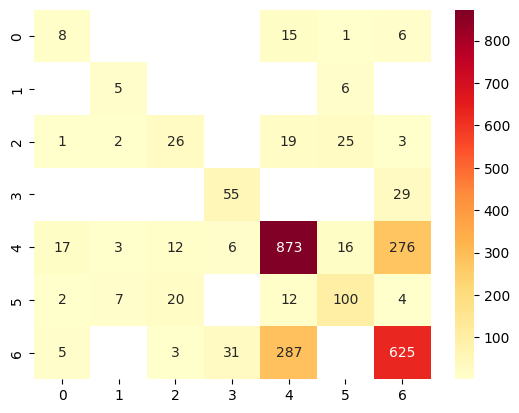

In [21]:
sns.heatmap(cm,
            annot=True, # para exibir as contagens nas células do gráfico
            fmt='d', # para que os valores sejam em formato inteiro
            cmap='YlOrRd', # o mesmo mapa de cor do yellowbrick
            mask = (cm == 0) # não exibe os valores e a cor onde o valor for igual a 0
            );

Exiba o reporte de classificação do modelo.

In [23]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.24      0.27      0.25        30
         1.0       0.29      0.45      0.36        11
         2.0       0.43      0.34      0.38        76
         3.0       0.60      0.65      0.62        84
         4.0       0.72      0.73      0.72      1203
         5.0       0.68      0.69      0.68       145
         6.0       0.66      0.66      0.66       951

    accuracy                           0.68      2500
   macro avg       0.52      0.54      0.53      2500
weighted avg       0.68      0.68      0.68      2500



## Classificador base (majority learner)

Implemente um classificador do tipo `MajorityLearner`.

In [25]:
majority = Orange.classification.MajorityLearner()

Faça predições para a base inteira com base nesse classificador.

In [26]:
y_test = Orange.evaluation.testing.TestOnTestData(base, base, [majority])

Exiba a acurácia deste classificador.

In [27]:
Orange.evaluation.CA(y_test)

array([0.4847])

Exiba o número de registros em cada classe na base inteira.

In [28]:
from collections import Counter
Counter(str(registro.get_class()) for registro in base)

Counter({'Lodgepole Pine': 4847,
         'Spruce/Fir': 3714,
         'Ponderosa Pine': 581,
         'Krummholz': 362,
         'Douglas-fir': 278,
         'Aspen': 163,
         'Cottonwood/Willow': 55})

Veja que a base tem 10 mil registros:

In [29]:
len(base)

10000

Isso significa que a classe majoritária, *Lodgepole Pine*, representa $4847/10000=0.4847\%$ dos dados, ou seja, exatamente a acurácia alcançada pelo classificador base do tipo *majority learner*.

# Aprendizagem baseada em instâncias - KNN

In [1]:
import pickle

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.neighbors import KNeighborsClassifier
from yellowbrick.classifier import ConfusionMatrix

Comece recuperando os dados preditores, de treino e de teste, a partir do arquivo `cover_type.pkl` salvo na pasta do Drive. Lembre-se de que você deve instanciar as variáveis `X` e `y`, dos splits `train` e `test`,  na mesma ordem que salvou.

In [2]:
with open('../datasets/processed/cover_type.pkl', 'rb') as f:
    X_train, Y_train, X_test, Y_test = pickle.load(f)

Instancie e ajuste um classificador do tipo `KNeighborsClassifier`. Não precisa passar nenhum parâmetro, pois você pode utilizar os valores padrão: `n_neighbors=5`, `p=2` e `metric='minkowski'`.

In [25]:
knn_classifier = KNeighborsClassifier(n_neighbors=5)
knn_classifier.fit(X_train, Y_train)

,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


Faça e exiba a predição no split de teste.

In [26]:
y_pred = knn_classifier.predict(X_test)
y_pred

array([4, 4, 5, ..., 6, 6, 2], shape=(2500,))

In [27]:
Y_test

array([4, 4, 1, ..., 6, 6, 5], shape=(2500,))

Calcule a acurácia.

In [28]:
accuracy_score(Y_test, y_pred)

0.7552

Exiba a matriz de confusão.

0.7552

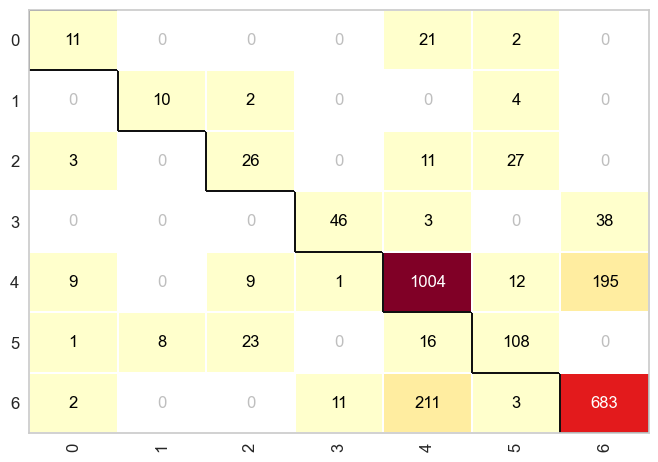

In [29]:
cm = ConfusionMatrix(knn_classifier)
cm.fit(X_train, Y_train)
cm.score(X_test, Y_test)

Exiba o reporte de classificação.

In [30]:
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.42      0.32      0.37        34
           1       0.56      0.62      0.59        16
           2       0.43      0.39      0.41        67
           3       0.79      0.53      0.63        87
           4       0.79      0.82      0.80      1230
           5       0.69      0.69      0.69       156
           6       0.75      0.75      0.75       910

    accuracy                           0.76      2500
   macro avg       0.63      0.59      0.61      2500
weighted avg       0.75      0.76      0.75      2500



# Regressão Logística

In [30]:
import pickle

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from yellowbrick.classifier import ConfusionMatrix

Comece recuperando os dados preditores, de treino e de teste, a partir do arquivo `cover_type.pkl` salvo na pasta do Drive. Lembre-se de que você deve instanciar as variáveis `X` e `y`, dos splits `train` e `test`,  na mesma ordem que salvou.

In [31]:
with open('../datasets/processed/cover_type.pkl', 'rb') as f:
    X_train, Y_train, X_test, Y_test = pickle.load(f)

Instancie e ajuste um classificador do tipo `LogisticRegression`. Para garantir reprodutibilidade, informe `random_state=0` ao construtor.

In [32]:
lr_classifier = LogisticRegression(random_state=0, max_iter=170)
lr_classifier.fit(X_train, Y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,0
,solver,'lbfgs'
,max_iter,170
,multi_class,'deprecated'


Você deve receber um aviso de que o algoritmo não convergiu. Não se preocupe, isso significa que ou o algoritmo ou os parâmetros utilizados não são adequados para nosso dataset, mas isso faz parte da nossa pesquisa pelo melhor classificador.

Exiba os interceptos determinados pelo algoritmo.

In [33]:
lr_classifier.intercept_

array([ 0.56074513, -5.4547289 , -1.56181902, -1.47406157,  5.49421375,
       -2.26959924,  4.70524985])

Exiba os coeficientes determinados pelo algoritmo.

In [34]:
lr_classifier.coef_

array([[-1.17268134e-01,  1.44703519e-02,  7.12317609e-02,
        -2.48089721e-01,  3.05894514e-01, -7.18350232e-01,
         7.62378440e-02,  2.32403464e-01, -1.50039705e-01,
        -9.54090656e-02,  1.14696702e+00, -1.95181322e-01,
         4.29276150e-01, -1.26667517e+00, -5.40515167e-02,
         9.22736154e-02, -8.47977118e-01, -1.25197336e-01,
        -4.27363363e-02, -3.68230369e-01, -1.78983754e-03,
        -9.20187874e-03, -7.34364368e-01, -4.08460692e-02,
         5.90021931e-01, -9.58673322e-01,  8.23548017e-01,
        -8.14295937e-02, -4.08346539e-01,  1.15906433e+00,
         7.82982068e-01,  4.35253113e-01, -2.78004943e-01,
        -4.01666749e-02, -6.10523943e-01, -5.99787091e-02,
        -1.79641675e-01, -3.92197091e-03, -2.79648302e-01,
        -1.31893357e-01, -2.16875838e-01,  5.88795239e-01,
         1.23855805e+00,  7.79920142e-01, -1.54597334e-01,
        -3.56010621e-01, -1.61046200e-01, -7.31913864e-03,
        -2.69897398e-03, -2.79162195e-04, -7.55981872e-0

Observe que, como este dataset representa um problema com mais de uma classe, cada uma as 7 classes apresenta sua própria coleção de coeficientes para os 54 atributos:

In [35]:
lr_classifier.coef_.shape

(7, 53)

Faça e exiba a predição no split de teste.

In [36]:
previsoes = lr_classifier.predict(X_test)
previsoes

array([4, 4, 1, ..., 4, 6, 5], shape=(2500,))

In [37]:
Y_test

array([4, 4, 1, ..., 6, 6, 5], shape=(2500,))

Calcule a acurácia.

In [38]:
accuracy_score(Y_test, previsoes)

0.7224

Exiba a matriz de confusão.

In [39]:
confusion_matrix(Y_test, previsoes)

array([[  0,   0,   0,   0,  31,   3,   0],
       [  0,  10,   3,   0,   0,   3,   0],
       [  0,   0,  15,   0,  16,  36,   0],
       [  0,   0,   0,  43,   0,   0,  44],
       [  0,   0,   4,   0, 974,  15, 237],
       [  1,   7,  12,   0,  19, 117,   0],
       [  0,   0,   0,  11, 250,   2, 647]])

0.7224

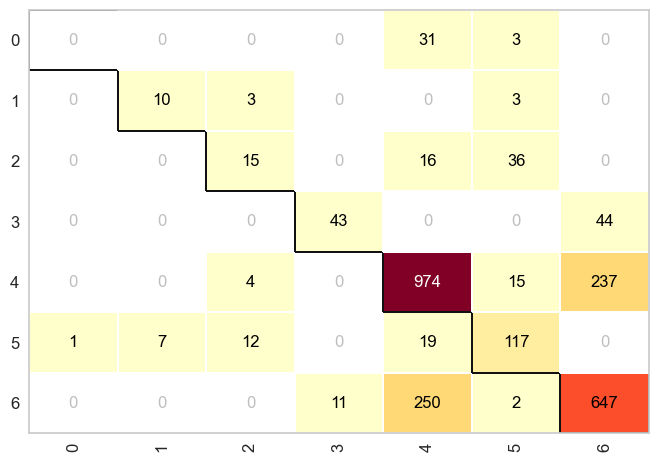

In [40]:
cm = ConfusionMatrix(lr_classifier)
cm.fit(X_train, Y_train)
cm.score(X_test, Y_test)

Exiba o reporte de classificação.

In [41]:
print(classification_report(Y_test, previsoes))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        34
           1       0.59      0.62      0.61        16
           2       0.44      0.22      0.30        67
           3       0.80      0.49      0.61        87
           4       0.76      0.79      0.77      1230
           5       0.66      0.75      0.70       156
           6       0.70      0.71      0.70       910

    accuracy                           0.72      2500
   macro avg       0.56      0.51      0.53      2500
weighted avg       0.71      0.72      0.71      2500



# Support Vector Machine - SVM

In [1]:
import pickle

import numpy as np

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from yellowbrick.classifier import ConfusionMatrix

Comece recuperando os dados preditores, de treino e de teste, a partir do arquivo `cover_type.pkl` salvo na pasta do Drive. Lembre-se de que você deve instanciar as variáveis `X` e `y`, dos splits `train` e `test`,  na mesma ordem em que salvou.

In [2]:
with open('../datasets/processed/cover_type.pkl', 'rb') as f:
    X_train, Y_train, X_test, Y_test = pickle.load(f)

Use o atributo `shape` para verificar quantas instâncias e quantos atributos têm as variáveis do split de treinamento.

In [3]:
X_train.shape, Y_train.shape

((7500, 53), (7500,))

In [5]:
X_test.shape, Y_test.shape

((2500, 53), (2500,))

Agora instancie e ajuste um classificador do tipo `SVC`. Utilize `kernel='rbf'` e `random_state=0`.

In [6]:
sv_classifier = SVC(kernel='rbf', random_state=0)
sv_classifier.fit(X_train, Y_train)

,C,1.0
,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


Faça e exiba a predição no split de teste.

In [7]:
previsoes = sv_classifier.predict(X_test)
previsoes

array([4, 4, 5, ..., 6, 6, 5], shape=(2500,))

In [8]:
Y_test

array([4, 4, 1, ..., 6, 6, 5], shape=(2500,))

Calcule a acurácia.

In [11]:
accuracy_score(Y_test, previsoes)

0.7672

Exiba a matriz de confusão.

0.7672

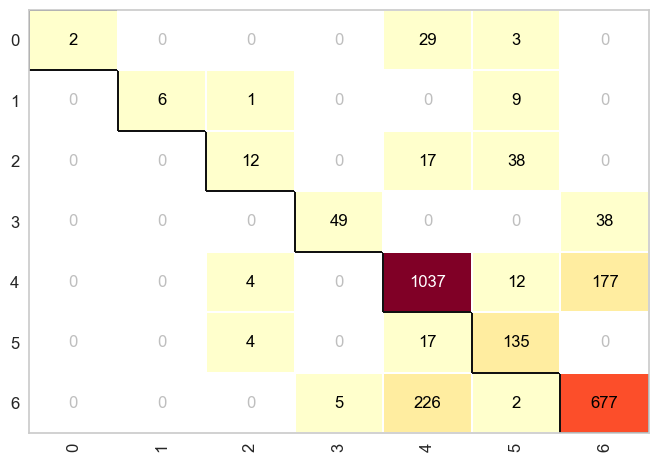

In [12]:
cm = ConfusionMatrix(sv_classifier)
cm.fit(X_train, Y_train)
cm.score(X_test, Y_test)

Exiba o reporte de classificação.

In [13]:
print(classification_report(Y_test, previsoes))

              precision    recall  f1-score   support

           0       1.00      0.06      0.11        34
           1       1.00      0.38      0.55        16
           2       0.57      0.18      0.27        67
           3       0.91      0.56      0.70        87
           4       0.78      0.84      0.81      1230
           5       0.68      0.87      0.76       156
           6       0.76      0.74      0.75       910

    accuracy                           0.77      2500
   macro avg       0.81      0.52      0.56      2500
weighted avg       0.77      0.77      0.76      2500



# Rede neural artificial

In [1]:
import pickle

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.neural_network import MLPClassifier
from yellowbrick.classifier import ConfusionMatrix

Comece recuperando os dados preditores, de treino e de teste, a partir do arquivo `cover_type.pkl` salvo na pasta do Drive. Lembre-se de que você deve instanciar as variáveis `X` e `y`, dos splits `train` e `test`,  na mesma ordem em que salvou.

In [2]:
with open ('../datasets/processed/cover_type.pkl', 'rb') as f:
    X_train, Y_train, X_test, Y_test = pickle.load(f)

Instancie e ajuste um classificador do tipo `MLPClassifier`. Altere os valores padrão dos parâmetros, utilizando `verbose=True`, e `hidden_layer_sizes=(100, 50)`.

In [6]:
mlp_classifier = MLPClassifier(verbose=True, hidden_layer_sizes=(100, 50), max_iter=500)
mlp_classifier.fit(X_train, Y_train)

Iteration 1, loss = 1.59665704
Iteration 2, loss = 0.97061267
Iteration 3, loss = 0.80036730
Iteration 4, loss = 0.72485597
Iteration 5, loss = 0.68171959
Iteration 6, loss = 0.65046554
Iteration 7, loss = 0.63144105
Iteration 8, loss = 0.61488549
Iteration 9, loss = 0.60290400
Iteration 10, loss = 0.59183171
Iteration 11, loss = 0.58328320
Iteration 12, loss = 0.57508836
Iteration 13, loss = 0.56604640
Iteration 14, loss = 0.55714496
Iteration 15, loss = 0.55021522
Iteration 16, loss = 0.54604107
Iteration 17, loss = 0.53734640
Iteration 18, loss = 0.53124992
Iteration 19, loss = 0.52957715
Iteration 20, loss = 0.52052041
Iteration 21, loss = 0.51600100
Iteration 22, loss = 0.51083821
Iteration 23, loss = 0.50626667
Iteration 24, loss = 0.50084387
Iteration 25, loss = 0.49734881
Iteration 26, loss = 0.49126462
Iteration 27, loss = 0.48576383
Iteration 28, loss = 0.48119179
Iteration 29, loss = 0.47725192
Iteration 30, loss = 0.47683820
Iteration 31, loss = 0.46901592
Iteration 32, los

,hidden_layer_sizes,"(100, ...)"
,activation,'relu'
,solver,'adam'
,alpha,0.0001
,batch_size,'auto'
,learning_rate,'constant'
,learning_rate_init,0.001
,power_t,0.5
,max_iter,500
,shuffle,True
,random_state,None


Faça e exiba a predição no split de teste.

In [7]:
previsoes = mlp_classifier.predict(X_test)
previsoes

array([4, 4, 1, ..., 6, 6, 2], shape=(2500,))

In [8]:
Y_test

array([4, 4, 1, ..., 6, 6, 5], shape=(2500,))

Calcule a acurácia.

In [9]:
accuracy_score(Y_test, previsoes)

0.7856

Exiba a matriz de confusão.

0.7856

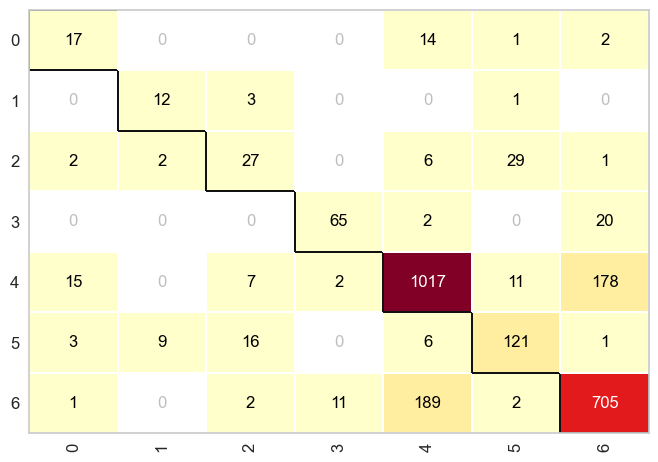

In [10]:
cm = ConfusionMatrix(mlp_classifier)
cm.fit(X_train, Y_train)
cm.score(X_test, Y_test)

Exiba o reporte de classificação.

In [11]:
print(classification_report(Y_test, previsoes))

              precision    recall  f1-score   support

           0       0.45      0.50      0.47        34
           1       0.52      0.75      0.62        16
           2       0.49      0.40      0.44        67
           3       0.83      0.75      0.79        87
           4       0.82      0.83      0.83      1230
           5       0.73      0.78      0.75       156
           6       0.78      0.77      0.78       910

    accuracy                           0.79      2500
   macro avg       0.66      0.68      0.67      2500
weighted avg       0.79      0.79      0.79      2500

